# Plotting in Python


For examples on how to make specific types of plots, you can look in the Python Graph Gallery: 
https://python-graph-gallery.com/

In [6]:
import matplotlib.pyplot as plt
# In order to see matplotlib plots within your jupyter notebook, you must add the line below. 
# This is NOT necessary if you are running python from the command line (in a .py file)
%matplotlib inline

from astropy.table import Table
import numpy as np

## Basic Scatter Plot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

In [35]:
# Read in some sample data 

t = Table.read('star-data.vot', format='votable')

print t.columns

print t

<TableColumns names=('solution_id','source_id','band','transit_id','time','mag','flux','flux_error','flux_over_error','rejected_by_photometry','rejected_by_variability','other_flags','p1','p2','p3','pf')>
   solution_id          source_id      band ...  p2  p3         pf        
                                            ...  d   d          d         
------------------ ------------------- ---- ... --- --- ------------------
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP ...  --  -- 0.5995735454969419
369295549951641967 1546016672688675200   BP .

In [37]:
# define some new variables to make working with our data a little easier

period = t['pf'][0]
phase = np.mod(t['time']/period, 1)

g = t['band'] == 'G'
g_phase = phase[g]
g_mag = t['mag'][g]
g_err = 1./t['flux_over_error'][g]

bp = t['band'] == 'BP'
bp_phase = phase[bp]
bp_mag = t['mag'][bp]

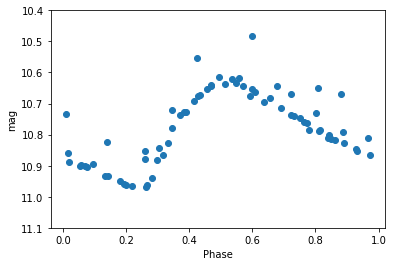

In [26]:
# Plot the light curve for one band. The 'o' argument sets the marker type

plt.plot(g_phase, g_mag, 'o') 
# Label the axes
plt.xlabel('Phase')
plt.ylabel('mag')
# We are plotting magnitudes on the y axis, so we need to flip the scale so bright is on top
plt.ylim(11.1, 10.4)
# Display your plot
plt.show()

### Adding more data

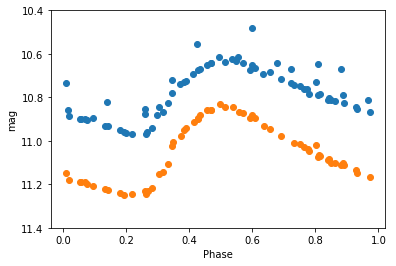

In [30]:
plt.plot(g_phase, g_mag, 'o')
# The second plot statement will automatically get assigned a new color
plt.plot(bp_phase, bp_mag, 'o') 
plt.xlabel('Phase')
plt.ylabel('mag')
plt.ylim(11.4, 10.4)
plt.show()

### Adding a legend

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

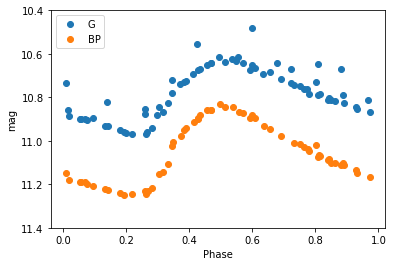

In [34]:
plt.plot(g_phase, g_mag, 'o', label='G')
plt.plot(bp_phase, bp_mag, 'o', label='BP')
plt.xlabel('Phase')
plt.ylabel('mag')
plt.ylim(11.4, 10.4)
plt.legend(loc=2)
plt.show()

### Working with error bars


https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

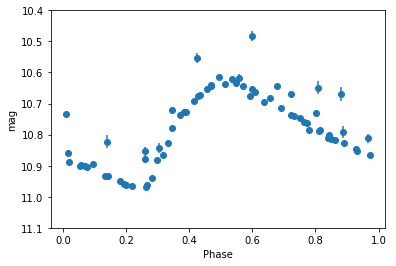

In [42]:
plt.errorbar(g_phase, g_mag, yerr=g_err, fmt='o')
plt.xlabel('Phase')
plt.ylabel('mag')
plt.ylim(11.1, 10.4)
plt.show()

# Subplots

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots

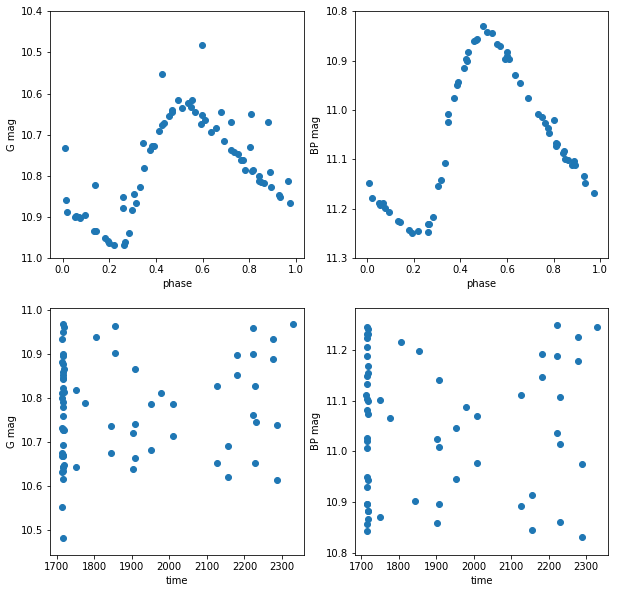

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].scatter(g_phase, g_mag)
axes[0,0].set_xlabel('phase')
axes[0,0].set_ylabel('G mag')
axes[0,0].set_ylim(11.0, 10.4)

axes[0,1].scatter(bp_phase, bp_mag)
axes[0,1].set_xlabel('phase')
axes[0,1].set_ylabel('BP mag')
axes[0,1].set_ylim(11.3, 10.8)

axes[1,0].scatter(t['time'][g], g_mag)
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('G mag')

axes[1,1].scatter(t['time'][bp], bp_mag)
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('BP mag')

plt.show()

# Histograms

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

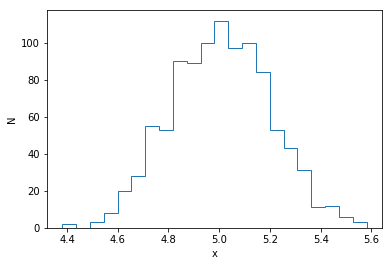

In [63]:
# create data to plot as histogram
data = np.random.normal(5, 0.2, 1000)


N, bins, patches = plt.hist(data, bins='auto', histtype='step')
plt.xlabel('x')
plt.ylabel('N')
plt.show()



# Techniques to make your plots prettier

### Colors

https://matplotlib.org/2.0.0/examples/color/named_colors.html

https://xkcd.com/color/rgb/

### Transparency

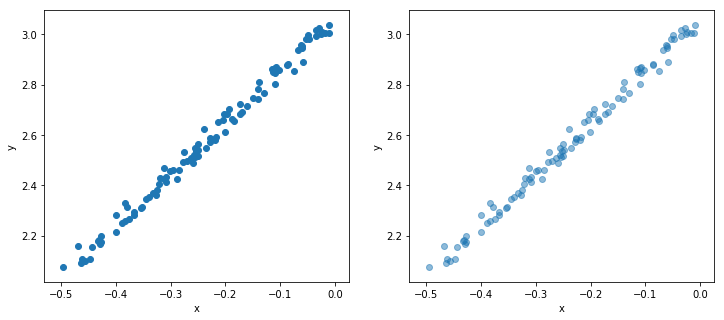

In [79]:
x = np.random.uniform(-0.5, 0, 100)
y = 2*x+3
err = np.random.uniform(0, 0.1, 100)
y_new = y + err

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(x, y_new)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].scatter(x, y_new, alpha=0.5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

plt.show()

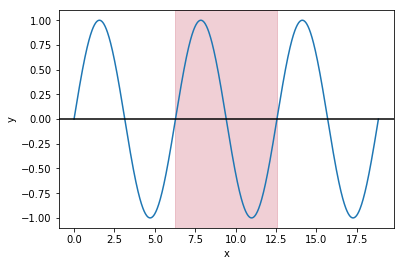

In [68]:
x = np.linspace(0,6*np.pi, 1000)
sinx = np.sin(x)

plt.plot(x, sinx)
plt.axvspan(2*np.pi, 4*np.pi, alpha=0.3, color='xkcd:rose')
plt.axhline(0, color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Avoid Overplotting

## Saving your plots
